<a href="https://colab.research.google.com/github/shrishtiswaraj/House-Price-Predicition/blob/main/House_Price_Predicition_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Importing the Boston house Price Dataset

In [28]:
house_price_dataset=sklearn.datasets.fetch_california_housing()
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [29]:
#loading data set to pandas dataframe
house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)


In [30]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [31]:
#add the target( house price ) column to the adatframe
house_price_dataframe['Price']=house_price_dataset.target
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [32]:
#checking the number of rows and column in the dataframe
house_price_dataframe.shape

(20640, 9)

In [33]:
#check for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [34]:
#statistical measure
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


UNDERSTANDING THE COORELATION BETWEEN VARIOUS FEATURE IN THE DATASET
1.POSITIVE COORELATION
2.NEGETIVE COORELATION


In [35]:
correlation=house_price_dataframe.corr()


<Axes: >

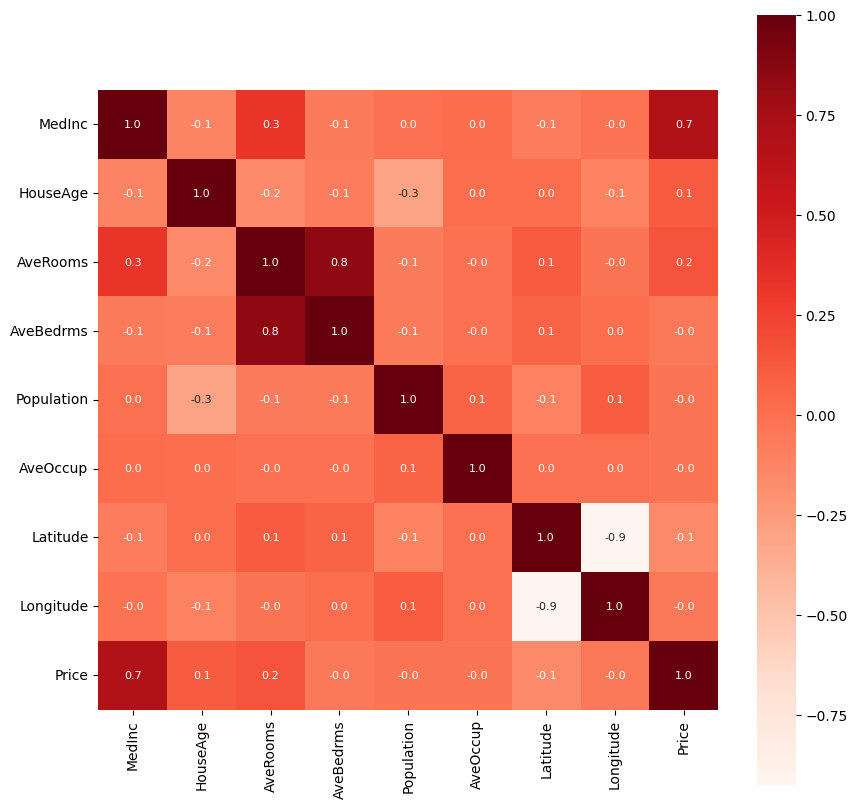

In [36]:
#constructing the heat map to understand the coorelation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

spliting the data and target


In [37]:
X=house_price_dataframe.drop(['Price'], axis=1)
Y=house_price_dataframe['Price']
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [38]:
#SPLITTING THE TRAIN TEST
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [39]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


MODEL TRAINING
XGBOOST REGRESSOR


In [40]:
#LOADING THE MODEL
model=XGBRegressor()



In [41]:
#fiting the model with xtrain
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

MODEL EVALUATION


In [42]:
#PREDECTION ON TRINING DATA
#accuracy for prediction on trining data
training_data_predection=model.predict(X_train)

In [43]:
print(training_data_predection)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [44]:

#in classification problem the common matrix used to measure is  acccuracy score
#and for regression its r square error and mean absolute error

In [45]:
#R SQUARE ERROR
score_1=metrics.r2_score(Y_train,training_data_predection)

#mean absolute

score_2=metrics.mean_absolute_error(Y_train,training_data_predection)

print("R SQUARED ERROR :",score_1)
#this should me closer to zero lessor the value more accurate the model is

print("MEAN ABSOLUTE ERROR :",score_2)



R SQUARED ERROR : 0.943650140819218
MEAN ABSOLUTE ERROR : 0.1933648700612105


VISUALIZING THE ACTUAL PRICE AND PREDICTED PRICE


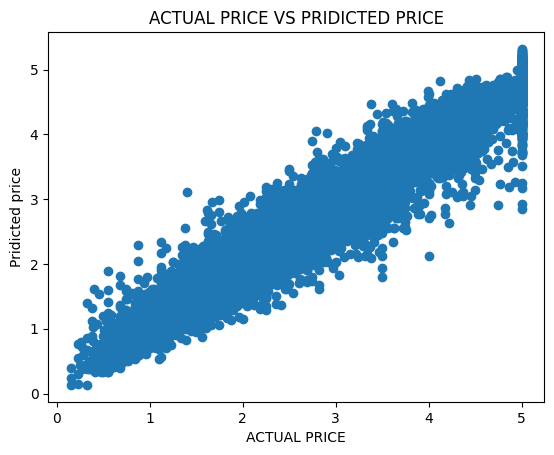

In [46]:
#SCATTER PLOT
plt.scatter(Y_train,training_data_predection)
plt.xlabel("ACTUAL PRICE")
plt.ylabel("Pridicted price")
plt.title("ACTUAL PRICE VS PRIDICTED PRICE")
plt.show()

error values for TEST DATA


In [47]:
#accuracy for prediction on trining data
test_data_predection=model.predict(X_test)


In [48]:
print(test_data_predection)

[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]


In [49]:
#R SQUARE ERROR
score_1=metrics.r2_score(Y_test,test_data_predection)

#mean absolute

score_2=metrics.mean_absolute_error(Y_test,test_data_predection)

print("R SQUARED ERROR :",score_1)
#this should me closer to zero lessor the value more accurate the model is

print("MEAN ABSOLUTE ERROR :",score_2)


R SQUARED ERROR : 0.8338000331788725
MEAN ABSOLUTE ERROR : 0.3108631800268186
